In [1]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten


In [3]:
# preparing independent & dependent features
def prepare_data(timeseries_data, n_features):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_ix = i + n_features # 0->3 ,1->4, 2->5
    if end_ix > len(timeseries_data) - 1:
      break
    # gathering input & output parts of the pattern
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)


In [13]:
# define input sequence 
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]

# choose a number of time steps 
n_steps = 3

#splitting into samples 
X, y = prepare_data(timeseries_data, n_steps)


In [14]:
print(X)
print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


In [15]:
X.shape , y.shape 

((6, 3), (6,))

In [16]:
#reshaping [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape(X.shape[0], X.shape[1], n_features)

In [17]:
X.shape


(6, 3, 1)

Building a LSTM Model 

In [26]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

#fit model
model.fit(X, y, epochs=300, verbose=0)

Predicting for next 10 days 

In [27]:
x_input = np.array([187, 196, 210])
temp_input = list(x_input)
lst_output = []
i=0
while(i<10):
  if (len(temp_input) > 3):
    x_input = np.array(temp_input[1:])
    #printing x_input
    print('{} day input: {}'.format(i, x_input))
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print('{} day output: {}'.format(i, yhat[0][0]))
    print()
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    #printing temp_input
    lst_output.append(yhat[0][0])
    i = i+1

  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    #print(yhat.shape)
    #print(yhat[0][0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i = i+1

1 day input: [196.         210.         222.25727844]
1 day output: 233.44537353515625

2 day input: [210.         222.25727844 233.44537354]
2 day output: 247.27455139160156

3 day input: [222.25728 233.44537 247.27455]
3 day output: 260.36761474609375

4 day input: [233.44537 247.27455 260.3676 ]
4 day output: 273.72900390625

5 day input: [247.27455 260.3676  273.729  ]
5 day output: 288.6405334472656

6 day input: [260.3676  273.729   288.64053]
6 day output: 303.5010986328125

7 day input: [273.729   288.64053 303.5011 ]
7 day output: 319.1070861816406

8 day input: [288.64053 303.5011  319.1071 ]
8 day output: 335.8290710449219

9 day input: [303.5011  319.1071  335.82907]
9 day output: 352.9747314453125



In [28]:
import matplotlib.pyplot as plt 


In [29]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [30]:
lst_output

[222.25728,
 233.44537,
 247.27455,
 260.3676,
 273.729,
 288.64053,
 303.5011,
 319.1071,
 335.82907,
 352.97473]

In [31]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)


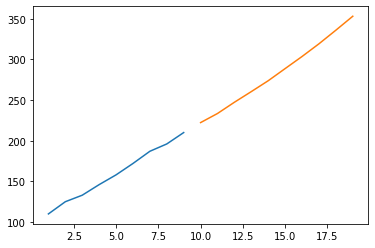

In [32]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred, lst_output)